In [1]:
from google.colab import files
import pickle as pkl
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Input,Dropout
from keras.models import Model
from scipy.spatial.distance import cosine

# Training the model and storing feature vectors of train images

In [2]:
from google.colab import drive
drive.mount('/content/drive')

train=pkl.load(open('/content/drive/MyDrive/IR_pickles/train_dict.pkl','rb'))
val=pkl.load(open('/content/drive/MyDrive/IR_pickles/val_dict.pkl','rb'))

Mounted at /content/drive


In [3]:
label_dict = dict()
count = 0
for ele in train.values():
  if ele[2] not in label_dict:
    label_dict[ele[2]] = count
    count += 1

for ele in val.values():
  if ele[2] not in label_dict:
    label_dict[ele[2]] = count
    count += 1

print(len(label_dict))

50


In [4]:
train_x = np.array([ele[1] for ele in train.values()]).reshape((45882,224,224,3))
train_y = np.array([label_dict[ele[2]] for ele in train.values()])
val_x = np.array([ele[1] for ele in val.values()]).reshape((8628,224,224,3))
val_y = np.array([label_dict[ele[2]] for ele in val.values()])

In [8]:
def make_model(num_of_filters=32, filter_size=(3, 3), initializer='he_uniform', activation_function='selu', dropout=0.2):
    inp=Input(shape=(224,224,3))
    conv1=layers.Conv2D(num_of_filters, filter_size, kernel_initializer=initializer, activation=activation_function)(inp)
    pool1=layers.MaxPool2D(2,2)(conv1)
    drop1=layers.Dropout(dropout)(pool1)
    conv2=layers.Conv2D(num_of_filters, filter_size, kernel_initializer=initializer, activation=activation_function)(drop1)
    pool2=layers.MaxPool2D(2,2)(conv2)
    drop2=layers.Dropout(dropout)(pool2)
    conv3=layers.Conv2D(num_of_filters, filter_size, kernel_initializer=initializer, activation=activation_function)(drop2)
    pool3=layers.MaxPool2D(2,2)(conv3)
    drop3=layers.Dropout(dropout)(pool3)
    flt=layers.Flatten()(drop3)
    mlp1=layers.Dense(512,activation=activation_function, kernel_initializer=initializer)(flt)
    output=layers.Dense(50,activation='softmax')(mlp1)
    model=Model(inputs=inp,outputs=output)
    return model

In [10]:
mdl = make_model()
mdl.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
mdl_history = mdl.fit(train_x,train_y,epochs=50,batch_size=32,validation_data=(val_x,val_y))

Epoch 1/50
1434/1434 [==============================] - 20s 12ms/step - loss: 106.5678 - accuracy: 0.4457 - val_loss: 4.0209 - val_accuracy: 0.3237
Epoch 2/50
1434/1434 [==============================] - 15s 11ms/step - loss: 2.3477 - accuracy: 0.4799 - val_loss: 2.9372 - val_accuracy: 0.3260
Epoch 3/50
1434/1434 [==============================] - 15s 11ms/step - loss: 2.3560 - accuracy: 0.4799 - val_loss: 2.9826 - val_accuracy: 0.3271
Epoch 4/50
1434/1434 [==============================] - 15s 11ms/step - loss: 2.3613 - accuracy: 0.4803 - val_loss: 2.9619 - val_accuracy: 0.3273
Epoch 5/50
1434/1434 [==============================] - 15s 11ms/step - loss: 2.3649 - accuracy: 0.4804 - val_loss: 2.9059 - val_accuracy: 0.3275
Epoch 6/50
1434/1434 [==============================] - 15s 11ms/step - loss: 2.3848 - accuracy: 0.4801 - val_loss: 2.9764 - val_accuracy: 0.3278
Epoch 7/50
1434/1434 [==============================] - 15s 11ms/step - loss: 2.3917 - accuracy: 0.4804 - val_loss: 3.0403

In [11]:
mdl.save("/content/cnn_model")
files.download('/content/cnn_model')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

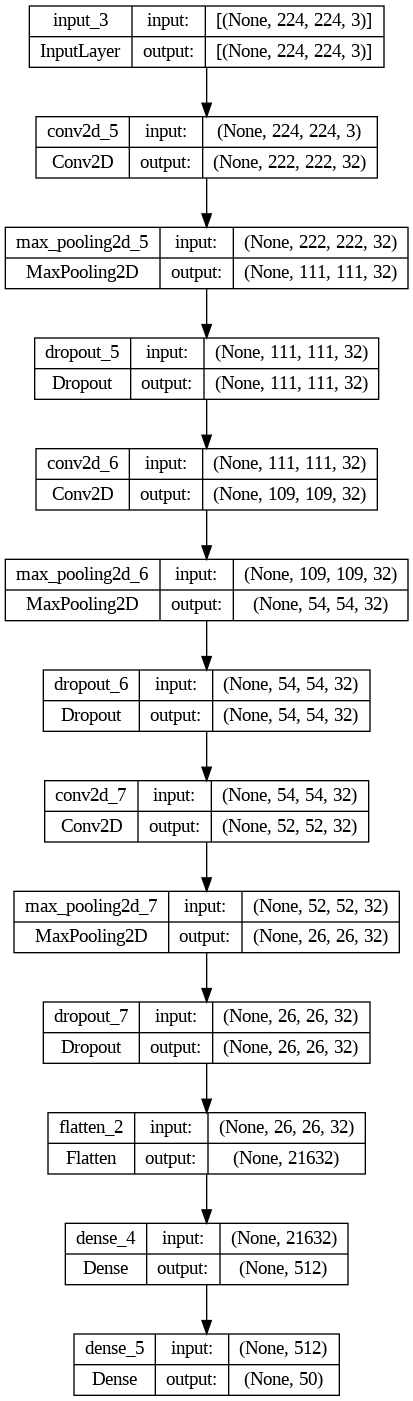

In [12]:
keras.utils.plot_model(mdl, "feature_extractor_model.png", show_shapes=True)

In [13]:
def plot_accuracy(model_history):                        # function for Accuracy plot - Training Accuracy and Validation Accuracy V/s Epochs
  epochs=np.arange(1,51,1)
  fig = plt.figure(figsize=(9, 5))
  plt.plot(epochs, model_history.history['accuracy'], linewidth=3.0, label = 'Train')
  plt.plot(epochs, model_history.history['val_accuracy'], color='orange', linewidth=3.0, label = 'Validation')
  plt.xlabel("epochs", fontsize=15)
  plt.ylabel("Accuracy", fontsize=15)
  plt.title("Training-Accuracy-and-Validation-Accuracy  Vs  Epochs", fontsize=20)
  plt.legend(loc='lower right')
  plt.show()
def plot_loss(model_history):                            # function for Loss plot - Training Loss and Validation Loss V/s Epochs
  epochs=np.arange(1,51,1)
  fig = plt.figure(figsize=(9, 5))
  plt.plot(epochs, model_history.history['loss'], linewidth=3.0, label = 'Train')
  plt.plot(epochs, model_history.history['val_loss'], color='orange', linewidth=3.0, label = 'Validation')
  plt.xlabel("epochs", fontsize=15)
  plt.ylabel("Loss", fontsize=15)
  plt.title("Training-Loss-and-Validation-Loss  Vs  Epochs", fontsize=20)
  plt.legend(loc='upper right')
  plt.show()

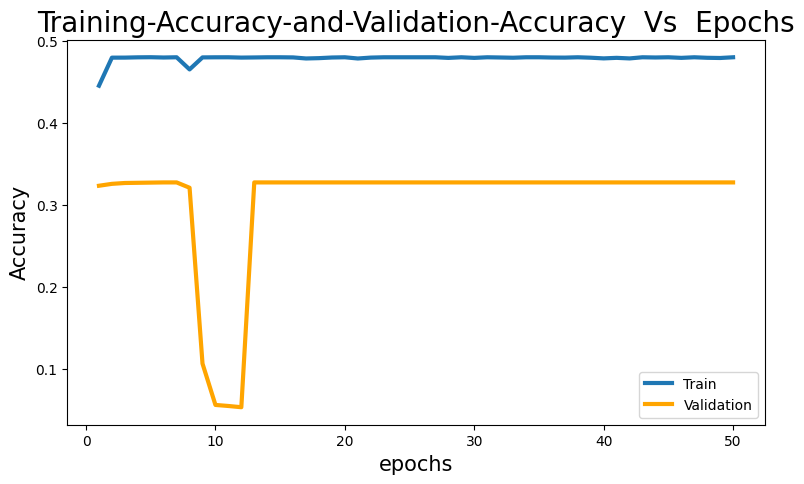

In [14]:
plot_accuracy(mdl_history)

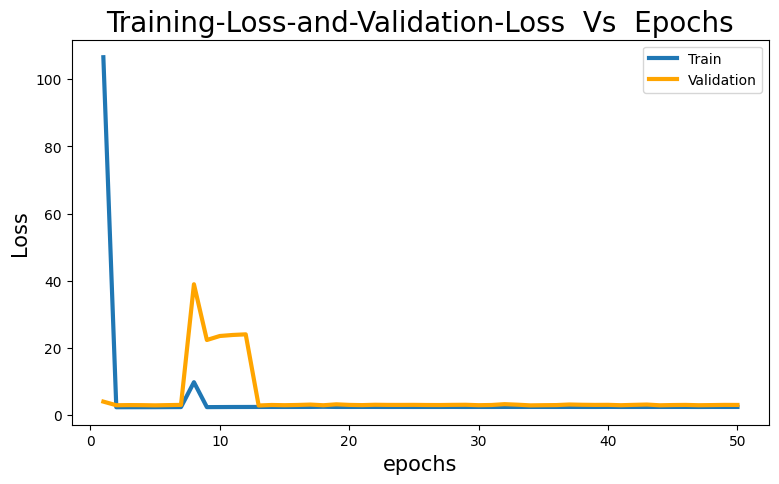

In [15]:
plot_loss(mdl_history)

In [16]:
mdl.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_5 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 111, 111, 32)      0         
                                                                 
 conv2d_6 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                       

In [17]:
ft_dict = dict()

def build_feature_dict():
  i = 0
  intermediate_layer_model = Model(inputs=mdl.input,outputs=mdl.get_layer('dense_4').output)  ### rectify it
  intermediate_output = intermediate_layer_model.predict(train_x)
  for item in train.values():
    ft_dict[i] = [item[0],item[1],intermediate_output[i]]
    i += 1

fobj=open('feature_dict.pkl','wb')
pkl.dump(ft_dict,fobj)
fobj.close()
files.download('feature_dict.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Testing

In [18]:
from google.colab import files
import pickle as pkl
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Input,Dropout
from keras.models import Model
from scipy.spatial.distance import cosine

In [19]:
uploads=files.upload() 
df = pd.read_csv('Train.csv')

Saving Train.csv to Train.csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

test=pkl.load(open('/content/drive/MyDrive/IR_pickles/test_dict.pkl','rb'))
features = ft_dict
#features=pkl.load(open('/content/drive/MyDrive/IR_pickles/feature_dict.pkl','rb'))
#mdl = keras.models.load_model("/content/drive/MyDrive/IR_pickles/cnn_model")

In [ ]:
def get_all_sim_img(test_ft):
  all_res_id = []
  for ft in test_ft:
    res = []
    for train_ft in features.values():
      sim = 1-cosine(train_ft[1],ft)
      res.append([train_ft[0],sim])
    res.sort(key = lambda x: x[1], reverse = True)
    res = [ele for ele in res if ele[1]>0.4]
    if len(res) > 10:
      all_res_id.append([res[i][0] for i in range(10)])
    else:
      all_res_id.append([ele[0] for ele in res])
  return all_res_id


test_x = [ele[1] for ele in test.values()]
intermediate_layer_model = Model(inputs=mdl.input,outputs=mdl.get_layer('dense_').output)  ### rectify it
test_ft = intermediate_layer_model.predict(test_x)

In [36]:
def get_sim_img(img):
  res = []
  intermediate_layer_model = Model(inputs=mdl.input,outputs=mdl.get_layer('dense_4').output)  ### rectify it
  ft = intermediate_layer_model.predict(img)
  for train_ft in features.values():
    sim = 1-cosine(train_ft[1],ft)
    res.append([train_ft[0],train_ft[1],sim])
  res.sort(key = lambda x: x[2], reverse = True)
  res = [ele for ele in res if ele[2]>0]
  if len(res) > 50:
    res = [[res[i][0],res[i][1]] for i in range(50)]
  else:
    res = [[res[i][0],res[i][1]] for i in range(len(res))]
  pids = [res[i][0] for i in range(len(res))]
  res_df = df.loc[pids]
  images = [res[i][1] for i in range(len(res))]
  return res_df, images

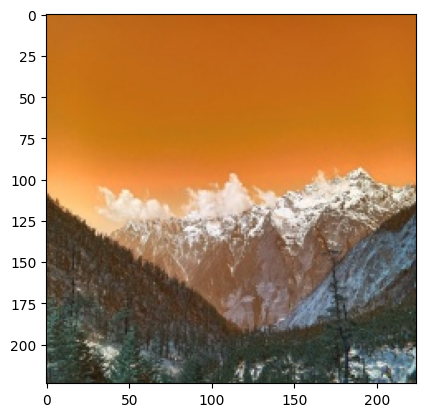

In [37]:
img_file = "/content/Tourist_attraction_8267.jpg"       # write the image file name
test_img = cv2.imread(img_file)
plt.imshow(test_img)